In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("/content/india biofuel production data.csv")
df.head()

,Year,Fuel ethanol (Mb/d),Biomass-based diesel (Mb/d),Coal (Mst),Coal (Mt),Generation (billion kWh)
0,1980,0.0,0.0,121502.1198,133933.0016,119.260
1,1981,0.0,0.0,132829.4573,146419.2391,131.120
2,1982,0.0,0.0,141607.1518,156094.9795,139.410
3,1983,0.0,0.0,149479.8499,164773.1333,144.987
4,1984,0.0,0.0,161234.8837,177730.8247,161.739


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 43 non-null     int64  
 1           Fuel ethanol (Mb/d)          43 non-null     float64
 2           Biomass-based diesel (Mb/d)  43 non-null     float64
 3   Coal (Mst)                           43 non-null     float64
 4   Coal (Mt)                            43 non-null     float64
 5       Generation (billion kWh)         43 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.1 KB


In [103]:
df = df.drop(columns=['Coal (Mst)'])

In [104]:
print(df.columns)

Index(['Year', '        Fuel ethanol (Mb/d)',
       '        Biomass-based diesel (Mb/d)', 'Coal (Mt)',
       '    Generation (billion kWh)'],
      dtype='object')


In [105]:
df = df.rename(columns={
    '        Fuel ethanol (Mb/d)': 'Ethanol (Mb/d)',
    '        Biomass-based diesel (Mb/d)': 'Bio-diesel (Mb/d)',
    '    Generation (billion kWh)': 'Electricity (billion kWh)'
})

In [106]:
print(df.columns)

Index(['Year', 'Ethanol (Mb/d)', 'Bio-diesel (Mb/d)', 'Coal (Mt)',
       'Electricity (billion kWh)'],
      dtype='object')


In [107]:
df.head()

,Year,Ethanol (Mb/d),Bio-diesel (Mb/d),Coal (Mt),Electricity (billion kWh)
0,1980,0.0,0.0,133933.0016,119.260
1,1981,0.0,0.0,146419.2391,131.120
2,1982,0.0,0.0,156094.9795,139.410
3,1983,0.0,0.0,164773.1333,144.987
4,1984,0.0,0.0,177730.8247,161.739


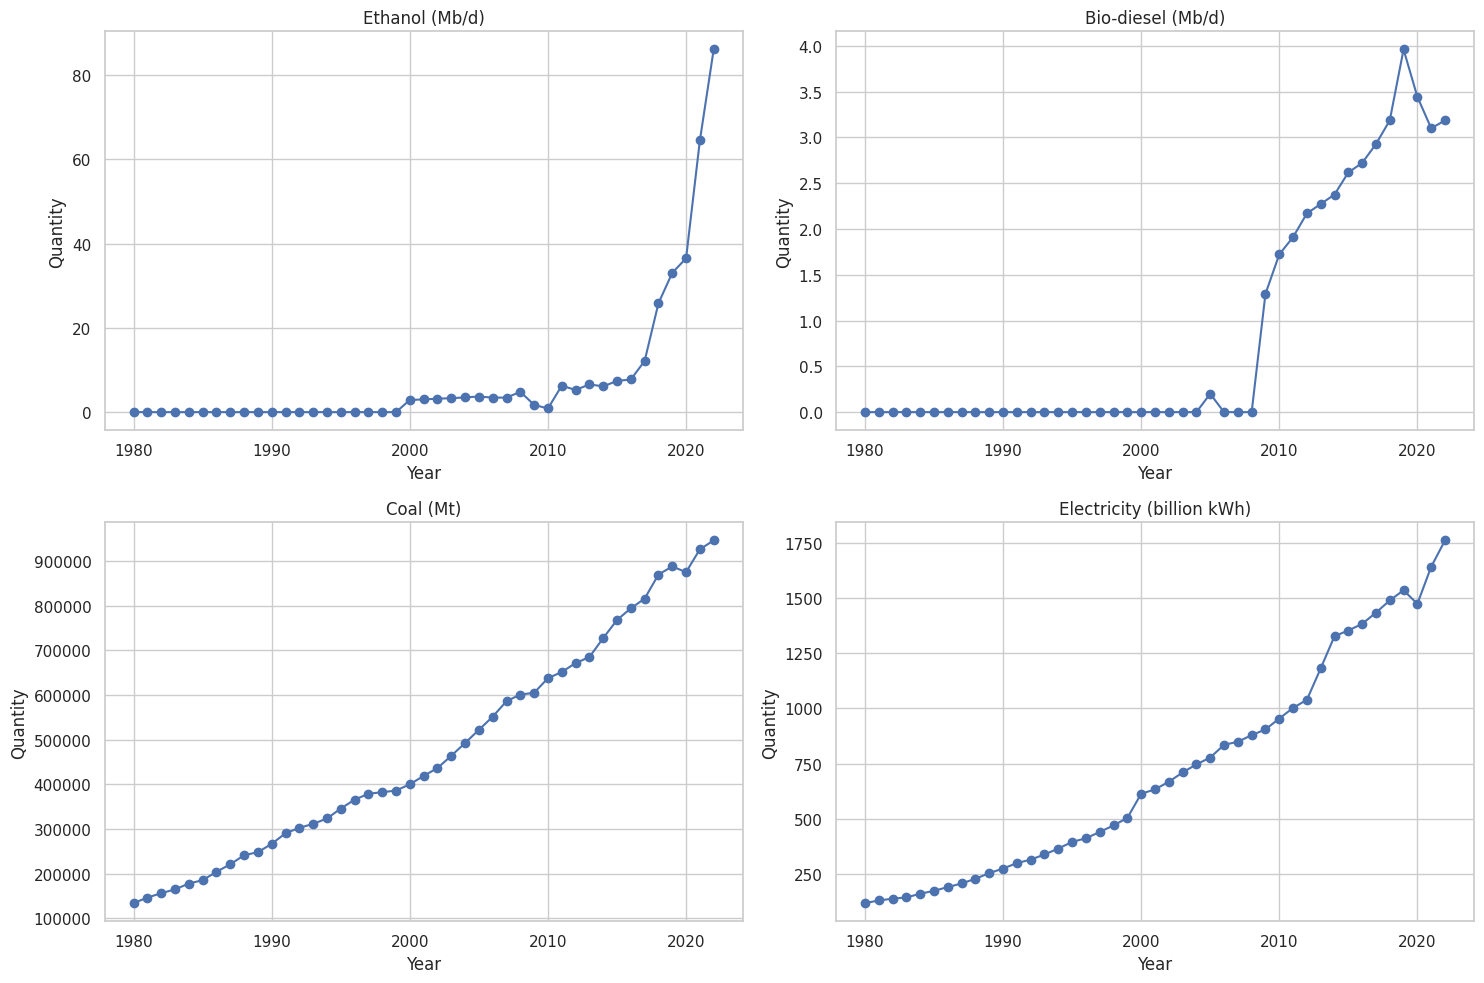

In [108]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot Ethanol (Mb/d)
axs[0, 0].plot(df['Year'], df['Ethanol (Mb/d)'], marker='o')
axs[0, 0].set_title('Ethanol (Mb/d)')

# Plot Bio-diesel (Mb/d)
axs[0, 1].plot(df['Year'], df['Bio-diesel (Mb/d)'], marker='o')
axs[0, 1].set_title('Bio-diesel (Mb/d)')

# Plot Coal (Mt)
axs[1, 0].plot(df['Year'], df['Coal (Mt)'], marker='o')
axs[1, 0].set_title('Coal (Mt)')

# Plot Electricity (billion kWh)
axs[1, 1].plot(df['Year'], df['Electricity (billion kWh)'], marker='o')
axs[1, 1].set_title('Electricity (billion kWh)')

# Set common labels
for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='Quantity')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


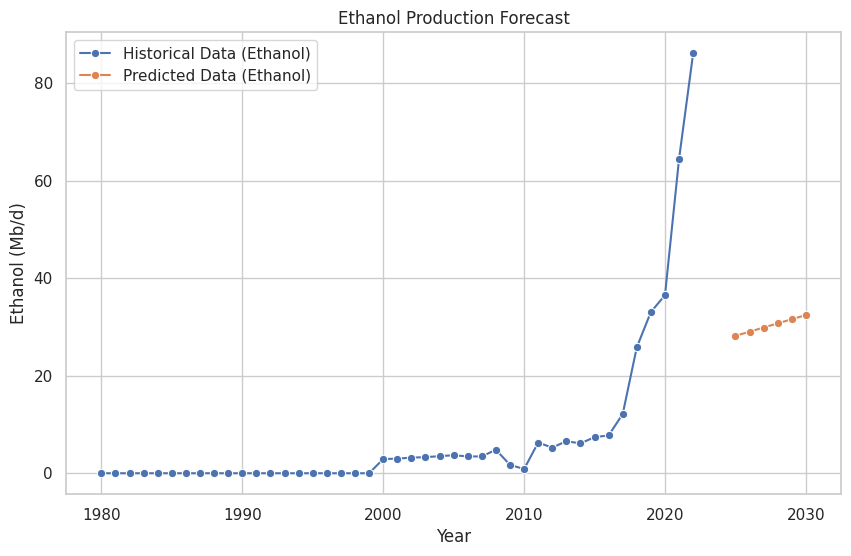

   Year  Ethanol (Mb/d)
0  2025       28.164947
1  2026       29.017343
2  2027       29.869740
3  2028       30.722136
4  2029       31.574533
5  2030       32.426930


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Prepare the data for regression
X = df[['Year']]
y = df['Ethanol (Mb/d)']

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Create future years data for prediction (up to 2030)
future_years = pd.DataFrame({'Year': np.arange(2025, 2031)})

# Predict future values
predictions = model.predict(future_years)

# Combine historical and predicted data for plotting
future_years['Ethanol (Mb/d)'] = predictions
df_combined = pd.concat([df, future_years])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot historical data for bio-diesel
sns.lineplot(x=df['Year'], y=df['Ethanol (Mb/d)'], marker='o', label='Historical Data (Ethanol)', ax=ax)

# Plot predicted data for bio-diesel
sns.lineplot(x=future_years['Year'], y=future_years['Ethanol (Mb/d)'], marker='o', label='Predicted Data (Ethanol)', ax=ax)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Ethanol (Mb/d)')
plt.title('Ethanol Production Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Display the predicted values for bio-diesel
print(future_years)


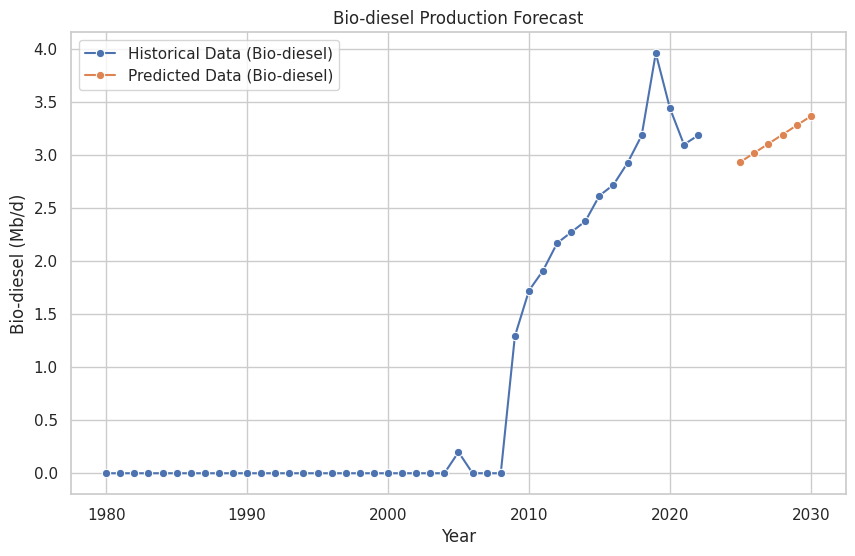

   Year  Bio-diesel (Mb/d)
0  2025           2.935150
1  2026           3.021511
2  2027           3.107872
3  2028           3.194233
4  2029           3.280593
5  2030           3.366954


In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Prepare the data for regression
X = df[['Year']]
y = df['Bio-diesel (Mb/d)']

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Create future years data for prediction (up to 2030)
future_years = pd.DataFrame({'Year': np.arange(2025, 2031)})

# Predict future values
predictions = model.predict(future_years)

# Combine historical and predicted data for plotting
future_years['Bio-diesel (Mb/d)'] = predictions
df_combined = pd.concat([df, future_years])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot historical data for bio-diesel
sns.lineplot(x=df['Year'], y=df['Bio-diesel (Mb/d)'], marker='o', label='Historical Data (Bio-diesel)', ax=ax)

# Plot predicted data for bio-diesel
sns.lineplot(x=future_years['Year'], y=future_years['Bio-diesel (Mb/d)'], marker='o', label='Predicted Data (Bio-diesel)', ax=ax)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Bio-diesel (Mb/d)')
plt.title('Bio-diesel Production Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Display the predicted values for bio-diesel
print(future_years)


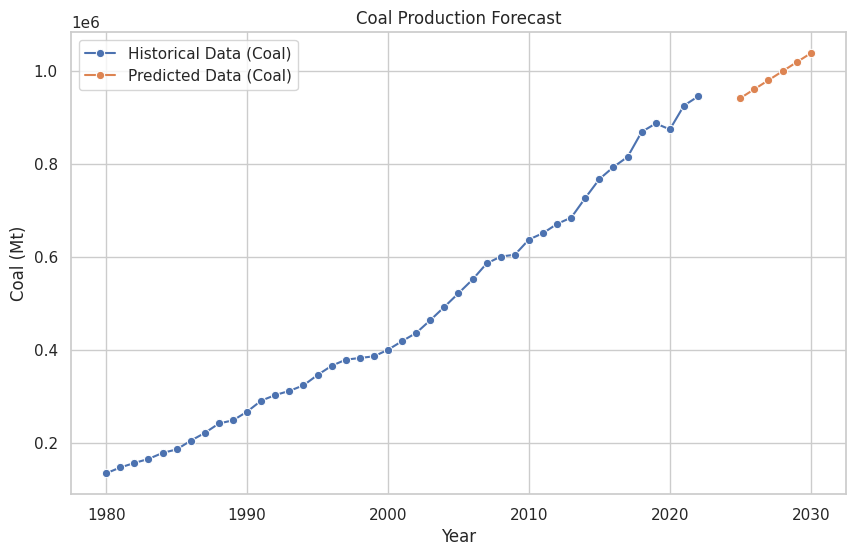

   Year     Coal (Mt)
0  2025  9.419872e+05
1  2026  9.613183e+05
2  2027  9.806495e+05
3  2028  9.999806e+05
4  2029  1.019312e+06
5  2030  1.038643e+06


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Prepare the data for regression
X = df[['Year']]
y = df['Coal (Mt)']

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Create future years data for prediction (up to 2030)
future_years = pd.DataFrame({'Year': np.arange(2025, 2031)})

# Predict future values
predictions = model.predict(future_years)

# Combine historical and predicted data for plotting
future_years['Coal (Mt)'] = predictions
df_combined = pd.concat([df, future_years])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot historical data for bio-diesel
sns.lineplot(x=df['Year'], y=df['Coal (Mt)'], marker='o', label='Historical Data (Coal)', ax=ax)

# Plot predicted data for bio-diesel
sns.lineplot(x=future_years['Year'], y=future_years['Coal (Mt)'], marker='o', label='Predicted Data (Coal)', ax=ax)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Coal (Mt)')
plt.title('Coal Production Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Display the predicted values for bio-diesel
print(future_years)


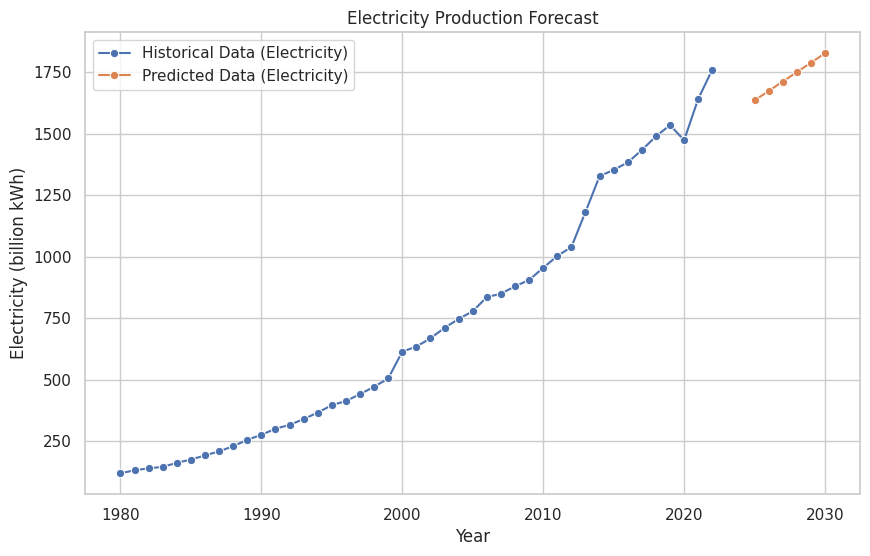

   Year  Electricity (billion kWh)
0  2025                1635.417279
1  2026                1673.740756
2  2027                1712.064233
3  2028                1750.387709
4  2029                1788.711186
5  2030                1827.034663


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Prepare the data for regression
X = df[['Year']]
y = df['Electricity (billion kWh)']

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Create future years data for prediction (up to 2030)
future_years = pd.DataFrame({'Year': np.arange(2025, 2031)})

# Predict future values
predictions = model.predict(future_years)

# Combine historical and predicted data for plotting
future_years['Electricity (billion kWh)'] = predictions
df_combined = pd.concat([df, future_years])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot historical data for bio-diesel
sns.lineplot(x=df['Year'], y=df['Electricity (billion kWh)'], marker='o', label='Historical Data (Electricity)', ax=ax)

# Plot predicted data for bio-diesel
sns.lineplot(x=future_years['Year'], y=future_years['Electricity (billion kWh)'], marker='o', label='Predicted Data (Electricity)', ax=ax)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Electricity (billion kWh)')
plt.title('Electricity Production Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Display the predicted values for bio-diesel
print(future_years)


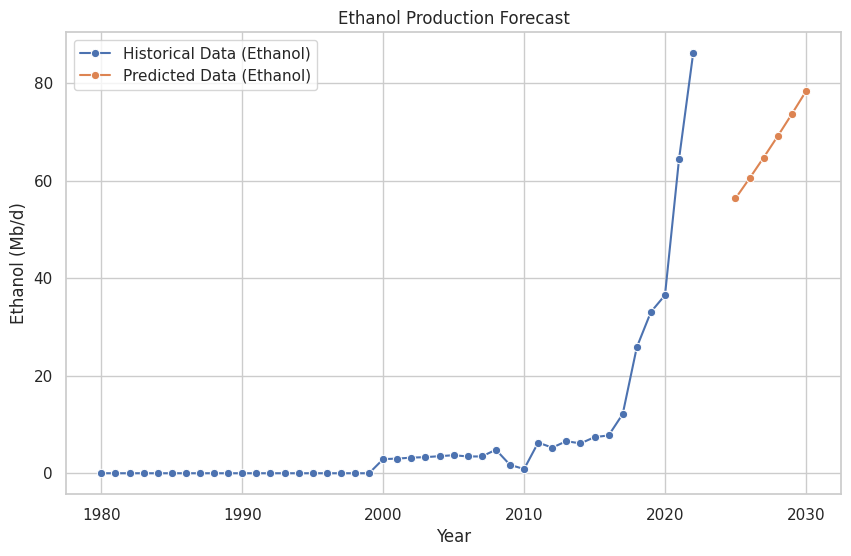

   Year  Ethanol (Mb/d)
0  2025       56.335394
1  2026       60.458766
2  2027       64.715648
3  2028       69.106039
4  2029       73.629940
5  2030       78.287349


In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample DataFrame with historical data for ethanol
# Prepare the data for regression
X = df[['Year']]
y = df['Ethanol (Mb/d)']

# Create a polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Create future years data for prediction (up to 2030)
future_years = pd.DataFrame({'Year': np.arange(2025, 2031)})
X_future_poly = poly.transform(future_years)

# Predict future values
predictions = model.predict(X_future_poly)

# Combine historical and predicted data for plotting
future_years['Ethanol (Mb/d)'] = predictions
df_combined = pd.concat([df, future_years])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot historical data for ethanol
sns.lineplot(x=df['Year'], y=df['Ethanol (Mb/d)'], marker='o', label='Historical Data (Ethanol)', ax=ax)

# Plot predicted data for ethanol
sns.lineplot(x=future_years['Year'], y=future_years['Ethanol (Mb/d)'], marker='o', label='Predicted Data (Ethanol)', ax=ax)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Ethanol (Mb/d)')
plt.title('Ethanol Production Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Display the predicted values for ethanol
print(future_years)


1/1 [==============================] - 0s 65ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


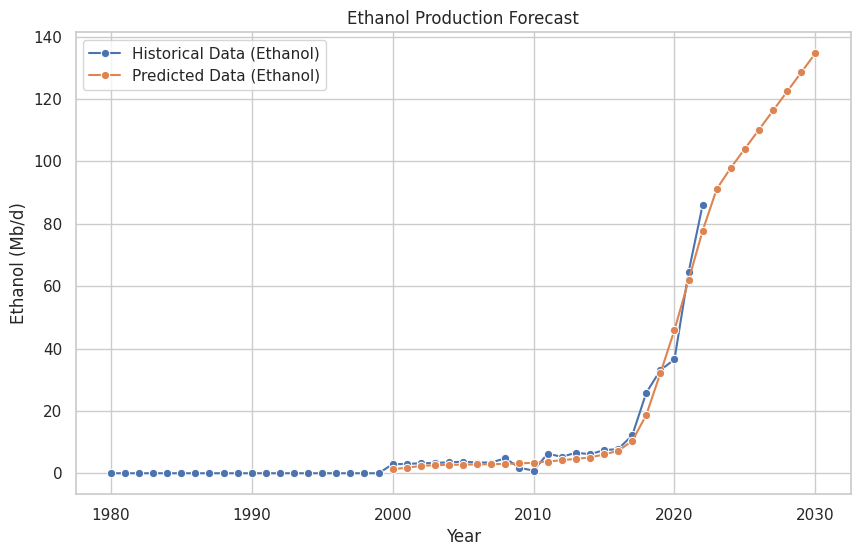

    Year  Ethanol (Mb/d)
0   2000        1.277232
1   2001        1.779382
2   2002        2.351609
3   2003        2.586388
4   2004        2.697993
5   2005        2.766558
6   2006        2.828418
7   2007        2.903265
8   2008        3.010709
9   2009        3.151855
10  2010        3.369178
11  2011        3.750957
12  2012        4.177837
13  2013        4.609977
14  2014        5.042113
15  2015        6.036712
16  2016        7.191063
17  2017       10.337996
18  2018       18.723606
19  2019       32.102135
20  2020       45.949589
21  2021       61.880360
22  2022       77.811134
23  2023       91.163124
24  2024       97.972351
25  2025      104.090309
26  2026      110.208252
27  2027      116.326218
28  2028      122.444168
29  2029      128.562134
30  2030      134.680099


In [115]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


# Prepare the data for training
X = df[['Year']].values
y = df['Ethanol (Mb/d)'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_scaled, y, epochs=1000, verbose=0)

# Create future years data for prediction (up to 2030)
future_years = pd.DataFrame({'Year': np.arange(2000, 2031)})
X_future_scaled = scaler.transform(future_years)

# Predict future values
predictions = model.predict(X_future_scaled).flatten()

# Combine historical and predicted data for plotting
future_years['Ethanol (Mb/d)'] = predictions
df_combined = pd.concat([df, future_years])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot historical data for ethanol
sns.lineplot(x=df['Year'], y=df['Ethanol (Mb/d)'], marker='o', label='Historical Data (Ethanol)', ax=ax)

# Plot predicted data for ethanol
sns.lineplot(x=future_years['Year'], y=future_years['Ethanol (Mb/d)'], marker='o', label='Predicted Data (Ethanol)', ax=ax)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Ethanol (Mb/d)')
plt.title('Ethanol Production Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Display the predicted values for ethanol
print(future_years)
